In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from tensorflow.keras.models import model_from_json

In [73]:
os.chdir(r'D:\0 bit\ECG')

In [74]:
data  = pd.read_csv('case_sample.csv')

In [75]:
sample = data.T

In [76]:
data.head()

,768
0,758
1,754
2,755
3,755
4,764


In [77]:
sample.shape

(1, 187)

In [78]:
os.getcwd()

'D:\\0 bit\\ECG'

In [79]:
scaler = joblib.load('scaller.h5')

In [80]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [81]:
sample = scaler.fit_transform(sample)

In [82]:
sample[0][1]

0.07193069812502202

In [83]:
result = np.round(loaded_model.predict(sample))

In [84]:
result

array([[0., 1., 0., 0., 0.]], dtype=float32)

In [85]:
result = result.tolist()

In [86]:
result = result[0]

In [109]:
if result[0] == 1:
    x = 'Non-ectopic beats (normal beat)'
    print(x)
elif result[1] == 1:
    x = 'Supraventricular ectopic beats'
    print(x)
elif result[2] == 1:
    x = 'Ventricular ectopic beats'
    print(x)
elif result[3] == 1:
    x = 'Fusion Beats'
    print(x)
elif result[4] == 1:
    x = 'Unknown Beats'
    print(x)

Supraventricular ectopic beats


In [110]:
x

'Supraventricular ectopic beats'

In [1]:
import random
v = random.randint(0,10000000000)
v

3229582608

In [111]:
print(f'the result (Heart arrhythmia type ) : {x} \n the number of the case : {v}')

the result (Heart arrhythmia type ) : Supraventricular ectopic beats 
 the number of the case : 4662636693


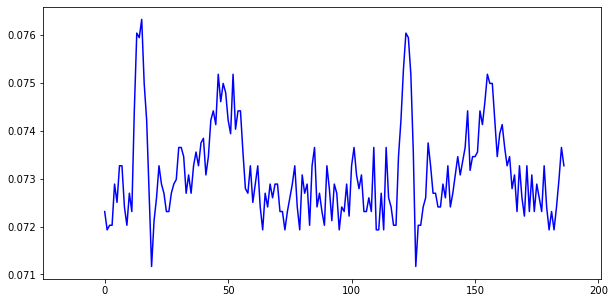

In [90]:
from matplotlib.pyplot import figure
x = pd.DataFrame(sample)
n = 6087305601
bins = np.arange(0, 58 + 2, 2).max()
plt.figure(figsize = [10,5])
plt.plot(x.iloc[0,:], color = 'blue')
plt.xlim([-25, 201])
plt.savefig(f'{v}.jpg');

In [91]:
x = x.to_json()

## save data in the realtime database (Firbase)

In [112]:
from weakref import ref
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db


# service account credentials
cred = credentials.Certificate(r'D:\0 bit\ECG\bycrash-f16c4-firebase-adminsdk-q95ea-21e5665ac8.json')

# initializing the app
firebase_admin.initialize_app(cred,{
    'databaseURL' : 'https://bycrash-f16c4-default-rtdb.firebaseio.com/'
})

In [113]:
print(v)
ref = db.reference(f'case{v}')
ref.set({
'number' :  {
    '1' : v
           },
'result' : {
    '2' : x
}
})

4662636693


## Save Data In json file

In [95]:
import json
def write_json(data, filename = r'D:\avd\bullet\assets\data2.json'):
    with open (filename, 'w') as f:
        json.dump(data, f)
with open (r'D:\avd\bullet\assets\data2.json') as json_file:
    data = json.load(json_file)
    temp = data['cases']
    y = {'number' : v, 'result' : x}
    temp.append(y)
write_json(data)

### Save The Data in SQLITE

In [96]:
import sqlite3 as sql

In [97]:
conn = sql.connect('disease result.db')

In [98]:
c = conn.cursor()

In [99]:
# c.execute("""   CREATE TABLE patients (

# id INTEGER NOT NULL PRIMARY KEY,
# result text
# )   """)
# conn.commit()


In [100]:
# c.execute(""" SELECT id FROM patients """)
# n = c.fetchone()
# conn.commit()

In [101]:
# n[0]

1

In [2]:
# id = len(n +1) + 3
# c.execute(f"INSERT INTO patients values (?, ?)",(id,x))
# conn.commit()

In [103]:
conn.close()

## save data in xampp mysql

In [104]:
# import mysql.connector
# import sys
# from PIL import Image
# import base64
# import PIL.Image
# image = Image.open(r'D:\0 bit\ECG\6087305601.jpg')
# blob_value = open(r'D:\0 bit\ECG\6087305601.jpg', 'rb').read()
# args = (blob_value)


In [1]:
import mysql.connector
conn = mysql.connector.connect(host = 'localhost', port = '3306', user = 'root', password = '', database = 'projectt2')
cursor = conn.cursor()
sql = "INSERT INTO doctor (id, email, password) VALUES (%s, %s, %s)"
val = (9, 'drsayed@ecg.com', '123456')

cursor.execute(sql, val)

conn.commit()

print(cursor.rowcount, "record inserted.")

In [114]:
import mysql.connector
conn = mysql.connector.connect(host = 'localhost', port = '3306', user = 'root', password = '', database = 'projectt2')
cursor = conn.cursor()
sql = "INSERT INTO patient (serial_number, patient_case) VALUES (%s, %s)"
val = (v, x)
cursor.execute(sql, val)
conn.commit()
print(cursor.rowcount, "record inserted.")

1 record inserted.


In [115]:
# sql1='select * from img'
# conn.commit()
# cursor.execute(sql1)
# data=cursor.fetchall()
# print (type(data[0][0]))
# file_like=cStringIO.StringIO(data[0][0])
# img=PIL.Image.open(file_like)
# img.show()

# db.close()

In [ ]:
# import base64
# import io
# sql1="select * from patient"
# cursor.execute(sql1)
# data = cursor.fetchall()

## saving data to csv file

In [116]:


# def convertToBinaryData(filename):
#     # Convert digital data to binary format
#     with open(filename, 'rb') as file:
#         binaryData = file.read()
#     return binaryData



# def insertBLOB(photo):
#     print("Inserting BLOB into python_employee table")
#     try:

#         sql_insert_blob_query = """ INSERT INTO python_employee
#                           (id, name, photo, biodata) VALUES (%s,%s,%s,%s)"""

#         empPicture = convertToBinaryData(photo)

#         # Convert data into tuple format
#         insert_blob_tuple = (empPicture)
#         result = cursor.execute(sql_insert_blob_query, insert_blob_tuple)
#         connection.commit()
#         print("Image and file inserted successfully as a BLOB into python_employee table", result)

#     except mysql.connector.Error as error:
#         print("Failed inserting BLOB data into MySQL table {}".format(error))



# insertBLOB(r'D:\0 bit\ECG\6087305601.JPG')

In [ ]:
import PIL.Image